In [70]:
import scipy.linalg as la
from DMRG.Ising import Hamilton_TL
from ETH import Rho, Gibbs, optimization as opt
import ETH.optimize_layers as ol
import analyse as al

In [71]:
from importlib import reload
reload(ol);
reload(Rho);

In [99]:
def diff_gibbs(rho, H, tt=None, vmax=1):
    b = Gibbs.rho2beta(H, rho)
    print(b)
    grho = Gibbs.beta2rho(H, b)
    l=Rho.compare(rho, grho)
    m=Rho.compare_all_trunks(rho, grho)
    cax = imshow(m, vmin=0, vmax=vmax);
    xlabel('Right end');
    ylabel('Left end');
    cbar = colorbar(cax)
    if tt:
        title(tt)

In [127]:
# Transverse field Ising model with longitudinal field
n=6
H = Hamilton_TL(n)['H']
rho = Rho.rho_prod_even(n, 1, rs=np.random)

0.11269631839759481


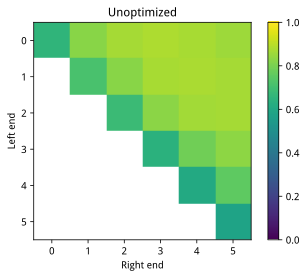

In [128]:
diff_gibbs(rho, H, tt='Unoptimized', vmax=1)

In [23]:
def plot_scatter_array(x, y):
    L = len(y)
    for i in range(L):
        plot(x[i]*ones_like(y[i]), y[i], 'ko')

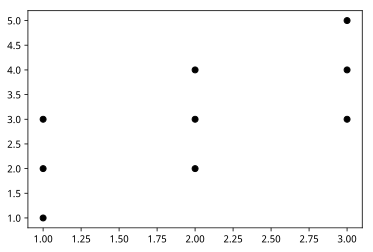

In [24]:
plot_scatter_array([1,2,3], [[1,2,3],[2,3,4],[3,4,5]])

In [129]:
rho2 = ol.minimize_local(H, rho, D=4, rel=1e-6)

In [130]:
rho3 = opt.minimize_var(H, rho, nit=1000)

Stop at 999 with f=0.1839338826197755, f1=0.07462666755199984, convex=True


0.2871685928280781


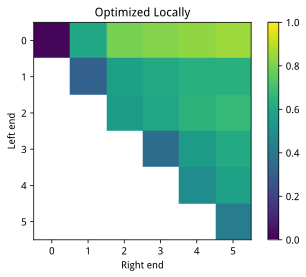

In [131]:
diff_gibbs(rho2, H, 'Optimized Locally', 1)

0.059870155539747616


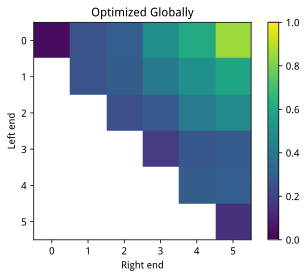

In [132]:
diff_gibbs(rho3, H, 'Optimized Globally', 1)

## Five layers

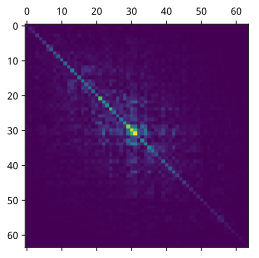

In [7]:
w, v = la.eigh(H)
rho3 = v.T.conj()@rho2@v
matshow(abs(rho3));

In [2]:
#rho2 = ol.minimize_local(H, rho, D=2, rel=1e-6)

## Two layers

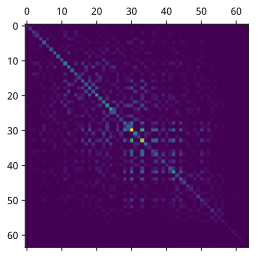

In [15]:
w, v = la.eigh(H)
rho3 = v.T.conj()@rho2@v
matshow(abs(rho3));

## Three layers

In [3]:
#rho2 = ol.minimize_local(H, rho, D=3, rel=1e-6)

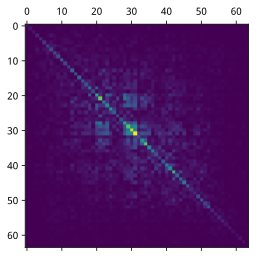

In [13]:
w, v = la.eigh(H)
rho3 = v.T.conj()@rho2@v
matshow(abs(rho3));

## Four layers

In [4]:
#rho2 = ol.minimize_local(H, rho, D=4, rel=1e-6)

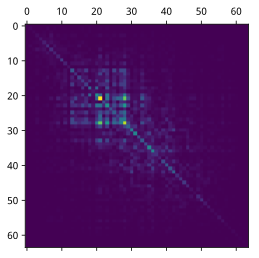

In [36]:
w, v = la.eigh(H)
rho3 = v.T.conj()@rho2@v
matshow(abs(rho3));

In [112]:
def mrange(n):
    return (np.arange(n)+0.5)/n

In [116]:
mrange(5)

array([0.1, 0.3, 0.5, 0.7, 0.9])

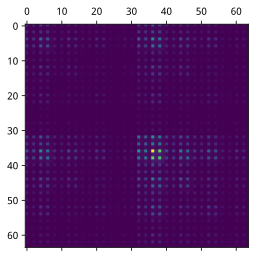

In [120]:
cax = matshow(abs(rho))

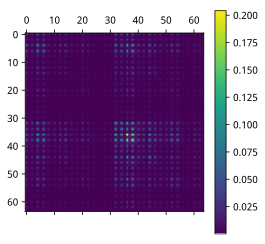

In [126]:
cax = matshow(abs(rho))
colorbar(cax)
clf()
cax = matshow(abs(rho))
colorbar(cax)